# Lab | Random variable distributions

Refer to the numerical.csv dataset that you previously saved.

### Instructions:

Use the numerical variables from our dataset this week.

Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [9]:
import pandas as pd
import numpy as np

data = pd.read_csv('numerical.csv')
data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


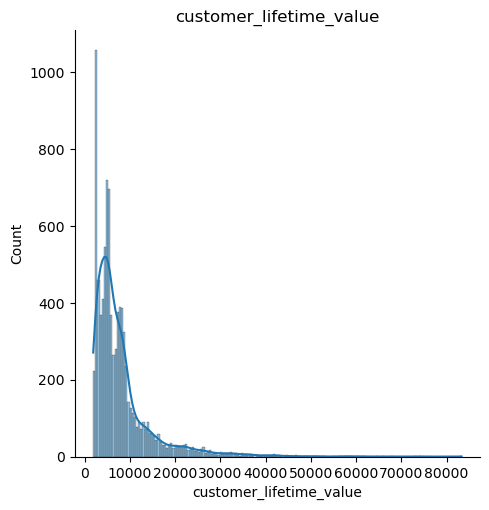

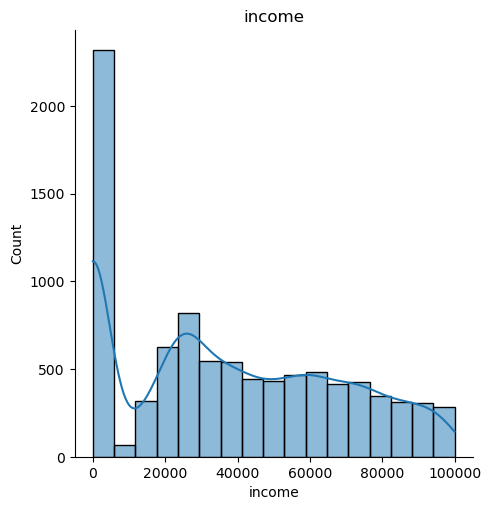

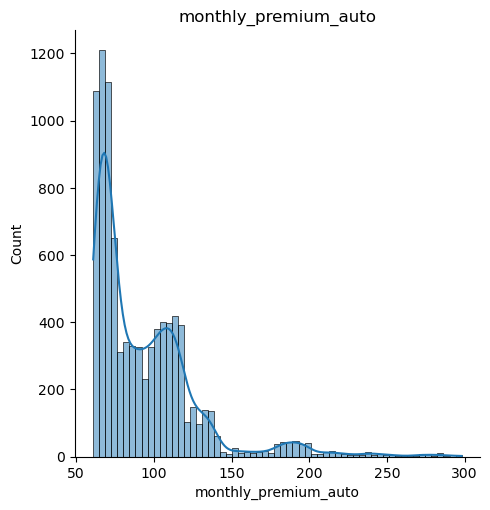

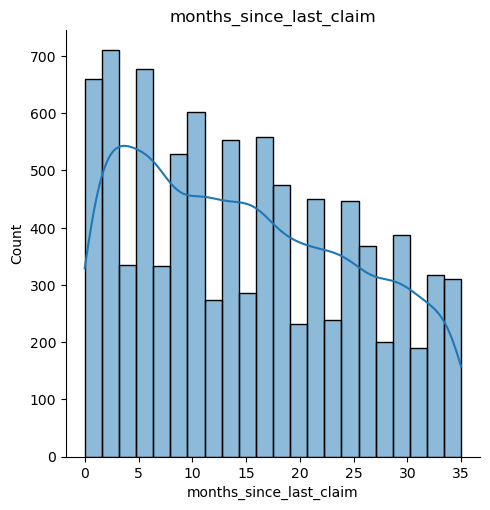

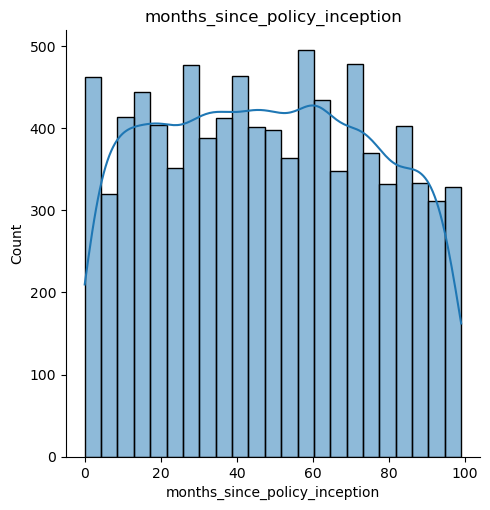

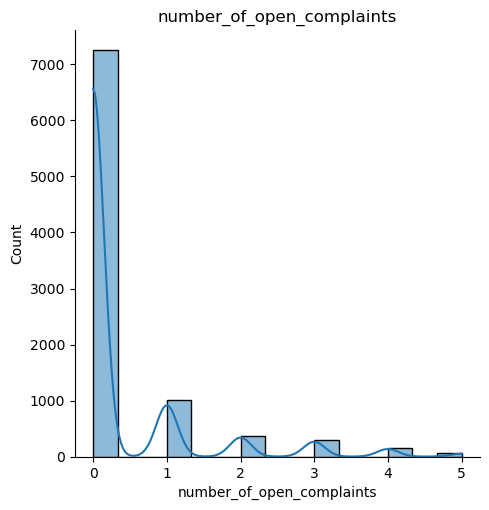

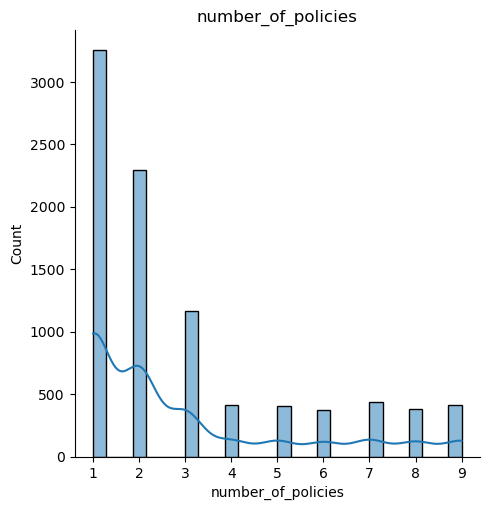

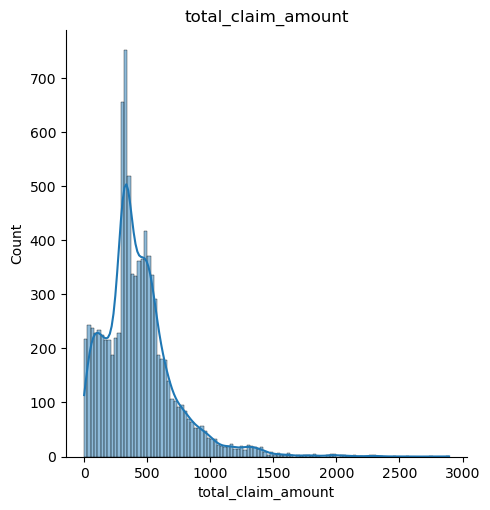

In [10]:
# function from cleaning numerical data lab

import seaborn as sns
import matplotlib.pyplot as plt

def plot_df(df):
    for col in df.columns:
        sns.displot(df[col], kde=True)
        plt.title(col)
        plt.show()

plot_df(data)

None of them look particularly like normal distributions.

months_since_last_claim looks like a triangle distribution.

months_since_policy_inception looks like a uniform distribution.

Many of the continuous features have long tails and/or high frequency of zero-values that skew the plots away from a symmetrical bell-curve.

The discrete features do not follow normal distributions either.

In [11]:
data.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

I will log transform the following to see if these can be forced towards a normal distribution:
- 'customer_lifetime_value'
- 'income'
- 'monthly_premium_auto'
- 'total_claim_amount'

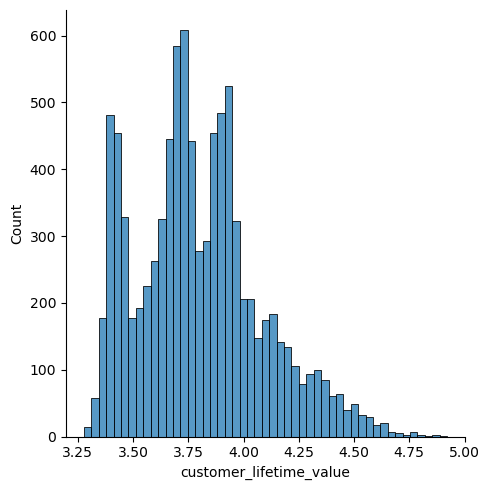

In [12]:
# from lesson 1.08

def log_transform(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

customer_lifetime_value_log = data['customer_lifetime_value'].apply(log_transform)
sns.displot(customer_lifetime_value_log)
plt.show()

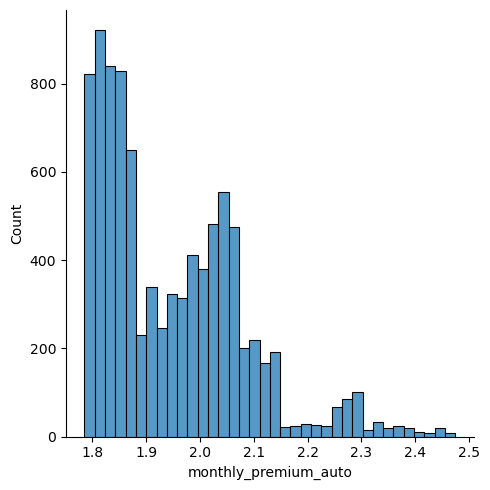

In [14]:
monthly_premium_auto_log = data['monthly_premium_auto'].apply(log_transform)
sns.displot(monthly_premium_auto_log)
plt.show()

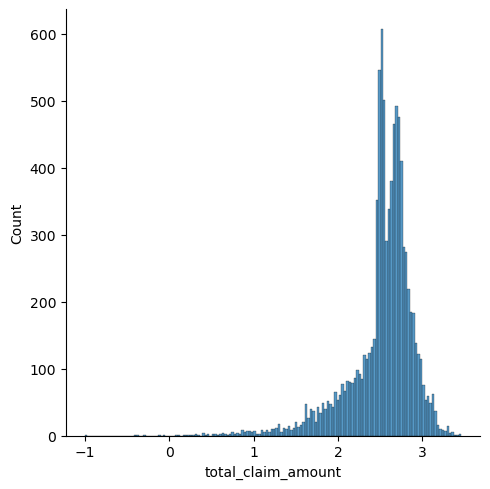

In [15]:
total_claim_amount_log = data['total_claim_amount'].apply(log_transform)
sns.displot(total_claim_amount_log)
plt.show()

customer_lifetime_value and total_claim_amount look slightly more normalised when a log transform is applied

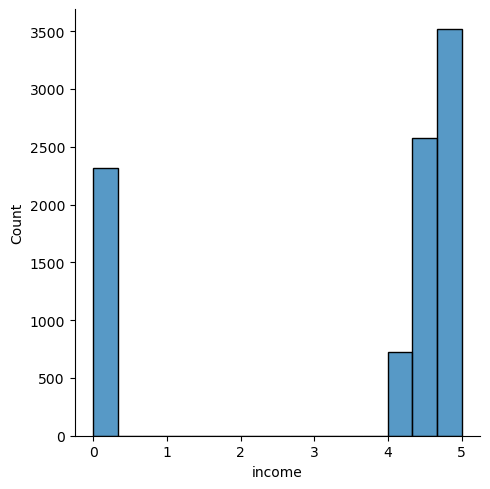

In [13]:
income_log = data['income'].apply(log_transform)
sns.displot(income_log)
plt.show()

income does not as there are lots of zeros. Let's remove those and look again.

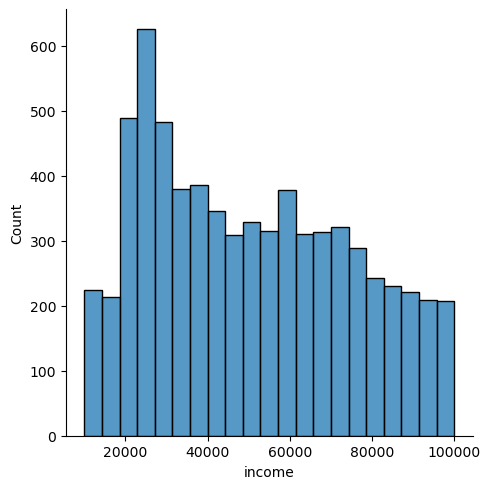

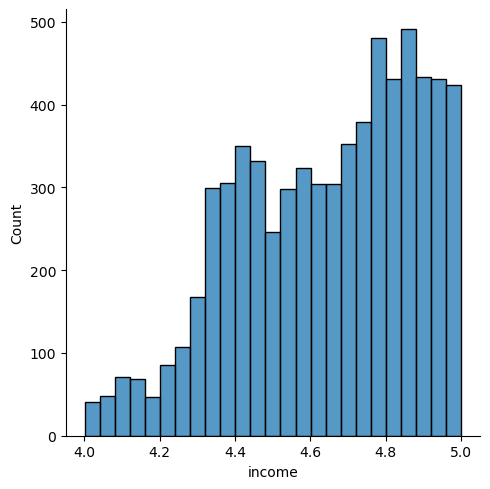

In [19]:
income_filtered = data['income'][data['income']>0]
sns.displot(income_filtered)
plt.show()

income_filtered_log = income_filtered.apply(log_transform)
sns.displot(income_filtered_log)
plt.show()

Without the zeros, the income distribution looks a little (from a distance!) like a normal distribution. Log transforming it does not help.

I'll take customer_lifetime_value log transformed and total_claim_amount log transformed and overlay a normal distribution to see.

In [26]:
customer_lifetime_value_log.describe()

count    9134.000000
mean        3.799452
std         0.283559
min         3.278298
25%         3.601435
50%         3.761942
75%         3.952413
max         4.920777
Name: customer_lifetime_value, dtype: float64

C:\Users\eliza\AppData\Local\Temp\ipykernel_1980\69923717.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_lifetime_value_log, bins=30)
C:\Users\eliza\AppData\Local\Temp\ipykernel_1980\69923717.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins=30)


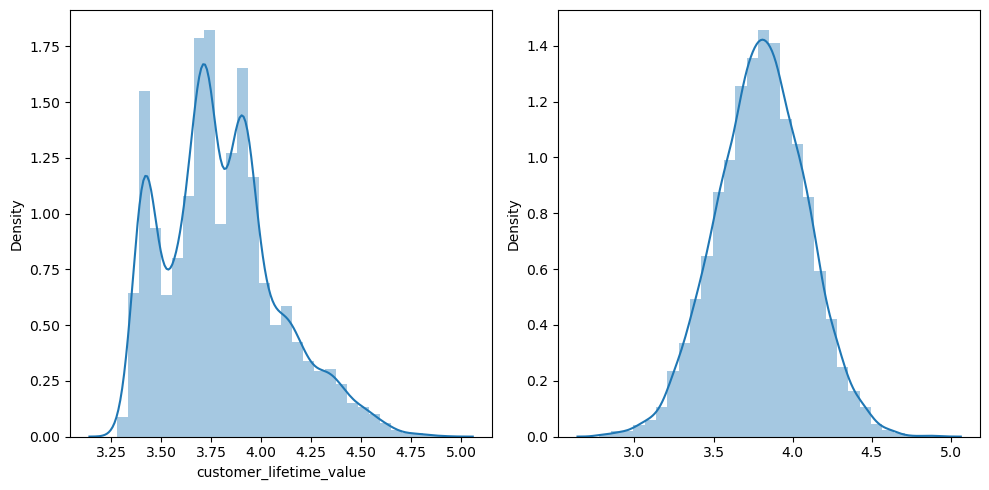

In [36]:
x = np.random.normal(3.799452,0.283559,9134)

plt.figure(figsize=(10, 5))
    
plt.subplot(1,2,1)
sns.distplot(customer_lifetime_value_log, bins=30)
    
plt.subplot(1,2,2)
sns.distplot(x, bins=30)
    
plt.tight_layout()
plt.show()

In [37]:
total_claim_amount_log.describe()

count    9134.000000
mean        2.514750
std         0.398051
min        -1.004334
25%         2.434981
50%         2.584270
75%         2.738396
max         3.461384
Name: total_claim_amount, dtype: float64

C:\Users\eliza\AppData\Local\Temp\ipykernel_1980\151325655.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_claim_amount_log, bins=30)
C:\Users\eliza\AppData\Local\Temp\ipykernel_1980\151325655.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, bins=30)


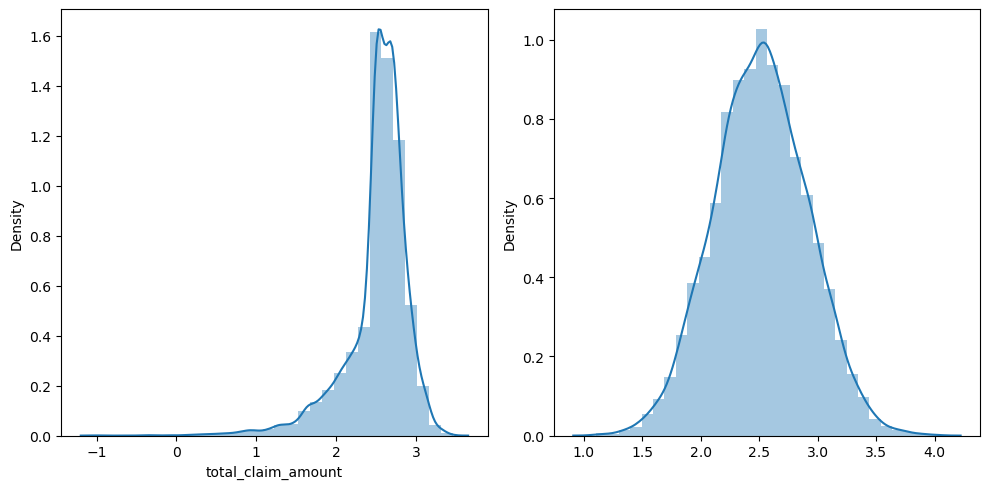

In [40]:
x2 = np.random.normal(2.514750,0.398051,9134)

plt.figure(figsize=(10, 5))
    
plt.subplot(1,2,1)
sns.distplot(total_claim_amount_log, bins=30)
    
plt.subplot(1,2,2)
sns.distplot(x2, bins=30)
    
plt.tight_layout()
plt.show()

In [ ]:
# code from Domenic to show plots side by side

for column in data.columns:
    
    log_for_plot = []
    log_for_plot = data[column].apply(log_transform)
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1,2,1)
    sns.distplot(data[column], bins=30)
    plt.title(f"distplot {column}")
    
    plt.subplot(1,2,2)
    sns.distplot(log_for_plot, bins=30)
    plt.title(f"log transformed {column}")
    
    plt.tight_layout()
    plt.show()